# Part 1) Load the data and make a datetime index.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns


import missingno as miss
import datetime as dt
import statsmodels.tsa.api as tsa

plt.rcParams['figure.figsize'] = [12,3]

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv"
df = pd.read_csv(url)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0


## 1. Convert the date column to datetime dtype.

In [4]:
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')

In [5]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


## 2. Setting the datetime index

In [7]:
df_ts = df.set_index('date')
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1979-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       14938 non-null  float64
 1   sunshine          14957 non-null  float64
 2   global_radiation  14939 non-null  float64
 3   max_temp          14951 non-null  float64
 4   mean_temp         14922 non-null  float64
 5   min_temp          14955 non-null  float64
 6   precipitation     14951 non-null  float64
 7   pressure          14953 non-null  float64
 8   snow_depth        13589 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [8]:
df_ts.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

## 3. Filter out only the required data

### Keep only data from 2000

In [9]:
df_time = df_ts.loc["2000":]
df_time.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
2000-01-01,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0
2000-01-02,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0
2000-01-03,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0
2000-01-04,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0
2000-01-05,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0


### Remove columns not features

In [10]:
df_ts = df_time.drop(columns=['cloud_cover','sunshine','global_radiation','pressure'])
df_ts

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0
...,...,...,...,...,...
2020-12-27,7.5,7.5,7.6,2.0,NaN
2020-12-28,3.6,1.1,-1.3,0.2,NaN
2020-12-29,4.1,2.6,1.1,0.0,NaN


In [11]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   max_temp       7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   precipitation  7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


## 4. Impute any missing values.

In [12]:
df_ts.isna().sum()

max_temp          390
mean_temp         419
min_temp          386
precipitation     390
snow_depth       1752
dtype: int64

In [13]:
df_ts['max_temp'] = df_ts['max_temp'].fillna(method='ffill')

In [14]:
df_ts['mean_temp']= df_ts['mean_temp'].interpolate()

In [15]:
df_ts['min_temp']= df_ts['min_temp'].fillna(method='bfill')

In [16]:
df_ts['precipitation']= df_ts['precipitation'].fillna(0)

In [17]:
df_ts['snow_depth']= df_ts['snow_depth'].fillna(method='bfill')

In [18]:
df_ts.isna().sum()

max_temp           0
mean_temp          0
min_temp           0
precipitation      0
snow_depth       366
dtype: int64

In [19]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   max_temp       7671 non-null   float64
 1   mean_temp      7671 non-null   float64
 2   min_temp       7671 non-null   float64
 3   precipitation  7671 non-null   float64
 4   snow_depth     7305 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


In [20]:
df_ts['snow_depth'].nunique()

9

In [21]:
df_ts['snow_depth'].value_counts()

0.0     7251
1.0       18
2.0       17
3.0        9
4.0        4
7.0        2
5.0        2
12.0       1
6.0        1
Name: snow_depth, dtype: int64

In [22]:
df_ts.isna().sum()

max_temp           0
mean_temp          0
min_temp           0
precipitation      0
snow_depth       366
dtype: int64

In [23]:
# Repalce NaN with zero on all columns 
df_ts = df_ts.fillna(0)
df_ts.isna().sum()

max_temp         0
mean_temp        0
min_temp         0
precipitation    0
snow_depth       0
dtype: int64

# Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)

## Q1: What month had the most precipitation between 2000 through 2010?

In [24]:
df_per = df_ts.copy()
df_per

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0
...,...,...,...,...,...
2020-12-27,7.5,7.5,7.6,2.0,0.0
2020-12-28,3.6,1.1,-1.3,0.2,0.0
2020-12-29,4.1,2.6,1.1,0.0,0.0


In [25]:
df_per.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

In [26]:
df_mon = df_per["2000":"2010"]
df_mon

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0
...,...,...,...,...,...
2010-12-27,8.0,0.2,-4.6,5.0,1.0
2010-12-28,9.5,5.3,2.5,0.4,0.0
2010-12-29,7.7,6.8,4.1,1.4,0.0


In [27]:
df_m = df_mon.resample('M').sum()
df_m

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-31,261.3,174.05,83.6,14.3,0.0
2000-02-29,298.6,208.25,114.2,62.2,0.0
2000-03-31,378.5,263.25,148.6,13.4,0.0
2000-04-30,397.4,269.90,161.3,71.8,0.0
2000-05-31,553.5,427.75,294.5,68.4,0.0
...,...,...,...,...,...
2010-08-31,666.7,542.05,413.6,83.8,0.0
2010-09-30,577.6,462.20,340.7,38.0,0.0
2010-10-31,469.8,367.35,264.9,61.0,0.0


In [28]:
max_precip = df_m['precipitation'].idxmax()
max_precip

Timestamp('2009-11-30 00:00:00', freq='M')

In [29]:
precip_ts = df_m['precipitation']
precip_ts

date
2000-01-31    14.3
2000-02-29    62.2
2000-03-31    13.4
2000-04-30    71.8
2000-05-31    68.4
              ... 
2010-08-31    83.8
2010-09-30    38.0
2010-10-31    61.0
2010-11-30    22.0
2010-12-31    21.2
Freq: M, Name: precipitation, Length: 132, dtype: float64

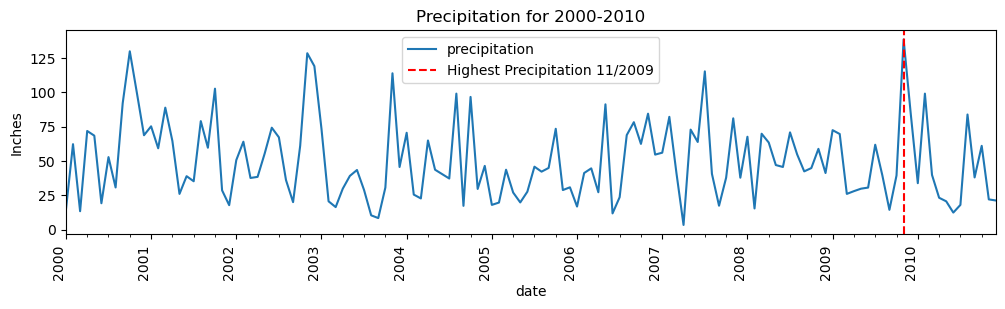

In [42]:
ax = precip_ts.plot(figsize=(12,3))
ax.set(title='Precipitation for 2000-2010', ylabel='Inches')
fmt = "%m/%Y"
ax.axvline(max_precip, ls='--', color='r',
          label= f'Highest Precipitation {max_precip.strftime(fmt)}')
ax.legend();

# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)
fmt_months = mdates.DateFormatter("%b")
## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(rotation=90)

In [33]:
# I have been trying to figure out why this doesn't want to give me years.

## Q2: Which year between 2000-2020 had the coolest average temperature?

In [34]:
ts_mi = df_ts.copy()
ts_mi

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0
...,...,...,...,...,...
2020-12-27,7.5,7.5,7.6,2.0,0.0
2020-12-28,3.6,1.1,-1.3,0.2,0.0
2020-12-29,4.1,2.6,1.1,0.0,0.0


In [35]:
ts_mi.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

In [36]:
df_tem = ts_mi["2000":"2020"]
df_tem

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0
...,...,...,...,...,...
2020-12-27,7.5,7.5,7.6,2.0,0.0
2020-12-28,3.6,1.1,-1.3,0.2,0.0
2020-12-29,4.1,2.6,1.1,0.0,0.0


In [37]:
df_y = df_tem.resample("Y").mean()
df_y

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-12-31,15.181694,11.575683,8.014208,1.974863,0.008197
2001-12-31,15.042466,11.331507,7.697260,1.850411,0.000000
2002-12-31,15.827397,12.084247,8.441370,2.060000,0.000000
2003-12-31,16.362192,12.114521,7.876712,1.261096,0.024658
2004-12-31,15.525410,11.900683,8.233607,1.622131,0.005464
2005-12-31,15.662740,11.822877,7.986027,1.155068,0.008219
2006-12-31,16.168767,12.290822,8.484932,1.656986,0.000000
2007-12-31,15.797534,11.944384,8.136712,1.778356,0.016438
2008-12-31,15.166120,11.326776,7.576776,1.698361,0.010929


In [38]:
min_temp = df_y['min_temp'].idxmin()
min_temp

Timestamp('2010-12-31 00:00:00', freq='A-DEC')

In [39]:
temp_ts = df_y['min_temp']
temp_ts

date
2000-12-31    8.014208
2001-12-31    7.697260
2002-12-31    8.441370
2003-12-31    7.876712
2004-12-31    8.233607
2005-12-31    7.986027
2006-12-31    8.484932
2007-12-31    8.136712
2008-12-31    7.576776
2009-12-31    7.757808
2010-12-31    6.793973
2011-12-31    8.361644
2012-12-31    7.329508
2013-12-31    7.372877
2014-12-31    8.639178
2015-12-31    8.185205
2016-12-31    7.912295
2017-12-31    8.353699
2018-12-31    8.321644
2019-12-31    7.932055
2020-12-31    8.666667
Freq: A-DEC, Name: min_temp, dtype: float64

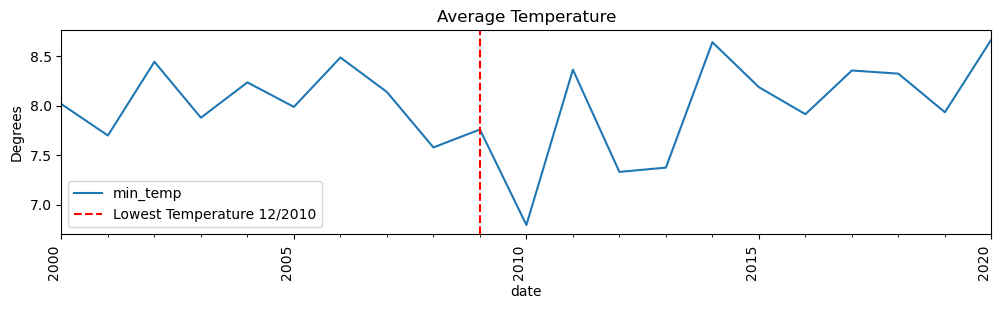

In [44]:
ax = temp_ts.plot(figsize=(12,3))
ax.set(title='Average Temperature', ylabel='Degrees')
fmt = "%m/%Y"
ax.axvline(max_precip, ls='--', color='r',
          label=  f'Lowest Temperature {min_temp.strftime(fmt)}')
ax.legend();

# create the locator to place ticks every 3 months.
loc_1year = mdates.YearLocator(1)
fmt_1year = mdates.DateFormatter("%Y")
## for major year ticks
loc_5year = mdates.YearLocator(5)
fmt_5year = mdates.DateFormatter("%Y")

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(rotation=90)